### Una vez limpiado los datos, hay diferentes para abordar el análisis de las columnas de texto, especialmente las que contienen diagnósticos:

1. Análisis de frecuencia de palabras: Una forma sencilla de empezar es simplemente contar la frecuencia de cada diagnóstico único. Esto puede ayudar a identificar los diagnósticos más comunes.

2. Nube de palabras: Una nube de palabras visualiza las palabras más frecuentes en tu texto, donde el tamaño de cada palabra es proporcional a su frecuencia.

3. Análisis de sentimientos: Aunque es más común en el análisis de comentarios o reseñas de productos, el análisis de sentimientos podría ser útil si los diagnósticos o los motivos de ingreso contienen cualquier tipo de subjetividad.

4. Análisis de temas con LDA (Latent Dirichlet Allocation): Esta es una forma de modelado de temas que puede ayudar a identificar los temas subyacentes en los diagnósticos.

5. Agrupación de texto (clustering): Utilizando técnicas como K-means, se puede agrupar diagnósticos similares juntos. Esto puede ser especialmente útil si existe un gran número de diagnósticos únicos.

6. Word Embeddings (incrustaciones de palabras): Herramientas como Word2Vec o GloVe pueden ayudar a convertir los diagnósticos en vectores numéricos para realizar análisis más avanzados.

Para empezar con alguno de estos, se necesita una forma de convertir los diagnósticos de texto en un formato que los algoritmos puedan entender. Algunas técnicas comunes:

1. Bolsa de palabras (Bag of Words): Esta es la forma más sencilla de convertir texto en números. Simplemente cuenta la cantidad de veces que cada palabra aparece.

2. TF-IDF: Similar a la Bolsa de Palabras, pero además de contar las frecuencias de las palabras, también toma en cuenta la frecuencia de las palabras en todo el corpus del documento. Esto ayuda a reducir la importancia de las palabras que aparecen con frecuencia, como "el", "un", etc.

3. Tokenización: Esto implica dividir el texto en palabras individuales (o tokens). Esto puede ser útil para eliminar las palabras comunes (también conocidas como stopwords), así como para el análisis de la frecuencia de las palabras.

4. One-hot encoding: Esta es otra forma de convertir texto en números al crear una matriz de variables binarias para cada palabra única.

La técnica a utilizar dependerá del problema específico que se esté intentando resolver, así como de la naturaleza de los datos.

In [1]:
# Importamos las librerias

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
catalog.list()

['hado_22',
 'hado_21',
 'hado_20',
 'hado_19',
 'hado_18',
 'hado_17',
 'hado_concat',
 'hado_values',
 'parameters']

In [3]:
df = catalog.load('hado_values')

[06/13/23 11:47:50] INFO     Loading data from 'hado_values' (CSVDataSet)...                    data_catalog.py:343

In [4]:
df.head()

,ast/anorx,s_procedencia,year,dolor,motivo_alta,delirium,disnea,h_procedencia,paliativo_onc/noc,ap,fiebre,medico,paliativo_no_onc/noc,diagnostico,sedacion,n_estancias,motivo_ing,n_visitas,gds/fast
0,si,upal,2017,si,reingreso,no,no,gil casares,si,no,no,valdes,si,ca orl,no,210.0,contro d sintomas,100.0,no
1,si,onc,2017,si,exitus,no,no,clinico,si,no,no,galego feal,no,melanoma vulvar,no,240.0,mal control dolor,80.0,no
2,no,mir,2017,no,fin de cuidados,no,si,clinico,si,no,no,lopez renedo,si,ca broncogenico,no,140.0,control evolutivo,60.0,no
3,no,dig,2017,no,fin de cuidados,no,no,clinico,no,no,no,lopez renedo,no,cirrosis hepatica,no,10.0,admininistacion octreotido,10.0,no
4,no,urg,2017,si,exitus,no,si,clinico,si,no,no,lopez renedo,no,neplasia de mama estadio iv,no,20.0,control de sintomas,10.0,no


# 1. Análisis de frecuencia

In [5]:
diagnostic_counts = df['diagnostico'].value_counts()

In [6]:
diagnostic_counts.sort_values(ascending=False)

itu                                     171
infeccion respiratoria                   96
infeccion urinaria                       85
icc                                      67
cancer de colon                          66
                                       ... 
apendicitis aguda                         1
proceso inflamatorio apendicular          1
osteomielitis pilon tibial izquierdo      1
carcinoma colon estadio iv                1
neoplasia pulmón                          1
Name: diagnostico, Length: 1624, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ast/anorx             3953 non-null   object 
 1   s_procedencia         3953 non-null   object 
 2   year                  3953 non-null   int64  
 3   dolor                 3953 non-null   object 
 4   motivo_alta           3953 non-null   object 
 5   delirium              3953 non-null   object 
 6   disnea                3953 non-null   object 
 7   h_procedencia         3953 non-null   object 
 8   paliativo_onc/noc     3953 non-null   object 
 9   ap                    3953 non-null   object 
 10  fiebre                3953 non-null   object 
 11  medico                3953 non-null   object 
 12  paliativo_no_onc/noc  3953 non-null   object 
 13  diagnostico           3953 non-null   object 
 14  sedacion              3952 non-null   object 
 15  n_estancias          

# 2. Análisis de correlación

In [8]:
df.astype({'n_estancias': 'int64', 'n_visitas': 'int64'})

,ast/anorx,s_procedencia,year,dolor,motivo_alta,delirium,disnea,h_procedencia,paliativo_onc/noc,ap,fiebre,medico,paliativo_no_onc/noc,diagnostico,sedacion,n_estancias,motivo_ing,n_visitas,gds/fast
0,si,upal,2017,si,reingreso,no,no,gil casares,si,no,no,valdes,si,ca orl,no,210,contro d sintomas,100,no
1,si,onc,2017,si,exitus,no,no,clinico,si,no,no,galego feal,no,melanoma vulvar,no,240,mal control dolor,80,no
2,no,mir,2017,no,fin de cuidados,no,si,clinico,si,no,no,lopez renedo,si,ca broncogenico,no,140,control evolutivo,60,no
3,no,dig,2017,no,fin de cuidados,no,no,clinico,no,no,no,lopez renedo,no,cirrosis hepatica,no,10,admininistacion octreotido,10,no
4,no,urg,2017,si,exitus,no,si,clinico,si,no,no,lopez renedo,no,neplasia de mama estadio iv,no,20,control de sintomas,10,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,no,onc,2022,si,exitus,no,no,clinico,si,no,no,beceiro,no,ca mama estadio iv,si,150,control de sintomas,70,no
3949,no,mir,2022,no,exitus,no,si,clinico,no,no,no,villar del castillo,si,anciano fragil,no,60,seguimiento,40,NaN
3950,si,mir,2022,si,paso a urgencias,no,si,clinico,si,no,no,fernandez benito,si,oclusion intestinal,no,210,cuidados paliativos avanzados,70,no
3951,no,urg,2022,no,exitus,si,no,clinico,no,no,si,fernandez benito,si,itu,si,110,antibioterapia iv,30,c


In [9]:
# Para correlaciones con variables numéricas puedes usar algo como esto:
df.groupby('diagnostico')['n_visitas'].mean()

diagnostico
abcesos hepaticos                  50.0
absceso                            40.0
absceso abdominal                  40.0
absceso cerebral                   50.0
absceso hepático                   66.0
                                  ...  
úlceras mmii                       50.0
úlceras necróticas                 40.0
úlceras por presión                10.0
úlceras por presión paraplejia    210.0
úlceras vasculares                100.0
Name: n_visitas, Length: 1624, dtype: float64

In [10]:
round(df.groupby('diagnostico')['n_estancias'].mean().sort_values(ascending=False),2)

diagnostico
cancer de pulmon                                        665357.38
ulceras de mal conmtrol en eeii                           3040.00
upps esclerosis múltiple epilepsia                        2040.00
neoplasia páncreas                                        1880.00
niemanpick                                                1800.00
                                                          ...    
ituictusendocarditis                                        10.00
posible sepsis de origen no filiado                         10.00
lesiones necróticas pie izqisquemia irreversible mii        10.00
adenoca de pulmón estadio iv                                 0.00
sde mielodisplásicolma                                       0.00
Name: n_estancias, Length: 1624, dtype: float64

In [11]:
# Para correlaciones con variables categóricas podrías usar tablas de contingencia
pd.crosstab(df['diagnostico'], df['fiebre'])

fiebre,b,ni,no,si
diagnostico,,,,
abcesos hepaticos,0,0,1,0
absceso,0,0,2,0
absceso abdominal,0,0,1,0
absceso cerebral,0,0,1,0
absceso hepático,0,0,5,0
...,...,...,...,...
úlceras mmii,0,0,1,0
úlceras necróticas,0,0,1,0
úlceras por presión,0,0,1,0


In [12]:
pd.crosstab(df['diagnostico'], df['fiebre']).sum()

fiebre
b        1
ni       4
no    3428
si     520
dtype: int64

In [13]:
df.describe()

,year,n_estancias,n_visitas
count,3953.000000,3.953000e+03,3953.000000
mean,2019.911460,7.218384e+03,60.258032
std,1.789463,4.443727e+05,69.970238
min,2017.000000,0.000000e+00,0.000000
25%,2018.000000,4.000000e+01,20.000000
50%,2020.000000,9.000000e+01,40.000000
75%,2022.000000,1.800000e+02,70.000000
max,2022.000000,2.793914e+07,990.000000


In [14]:
[len(x) for x in df]

[9, 13, 4, 5, 11, 8, 6, 13, 17, 2, 6, 6, 20, 11, 8, 11, 10, 9, 8]

# 3. Análisis temporal

In [15]:
#df.groupby(['year', 'diagnostico']).size().unstack().plot(kind='line', subplots=True)

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

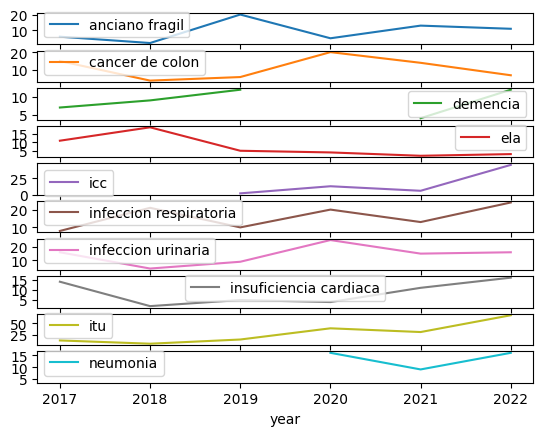

In [16]:
top_diagnoses = df['diagnostico'].value_counts().index[:10]  # top N diagnoses
df_top_diagnoses = df[df['diagnostico'].isin(top_diagnoses)]

df_top_diagnoses.groupby(['year', 'diagnostico']).size().unstack().plot(kind='line', subplots=True)

<Axes: xlabel='year', ylabel='diagnostico'>

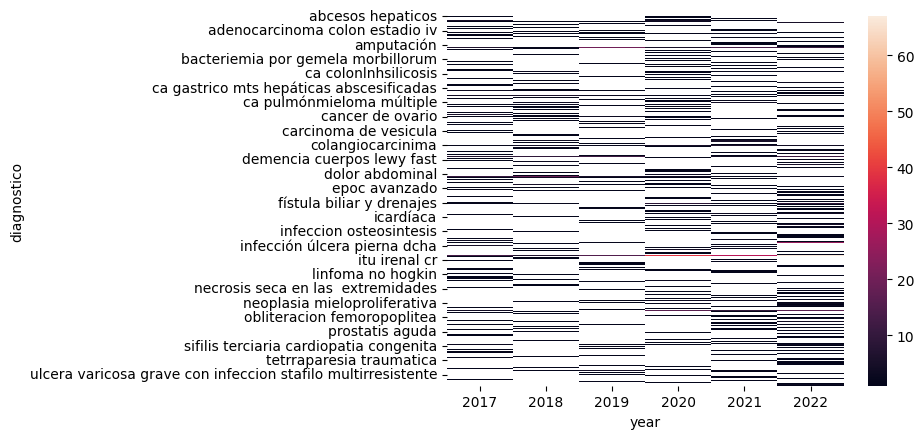

In [17]:
import seaborn as sns

diagnosis_counts = df.groupby(['diagnostico', 'year']).size().unstack()
sns.heatmap(diagnosis_counts)

<Axes: xlabel='diagnostico', ylabel='year'>

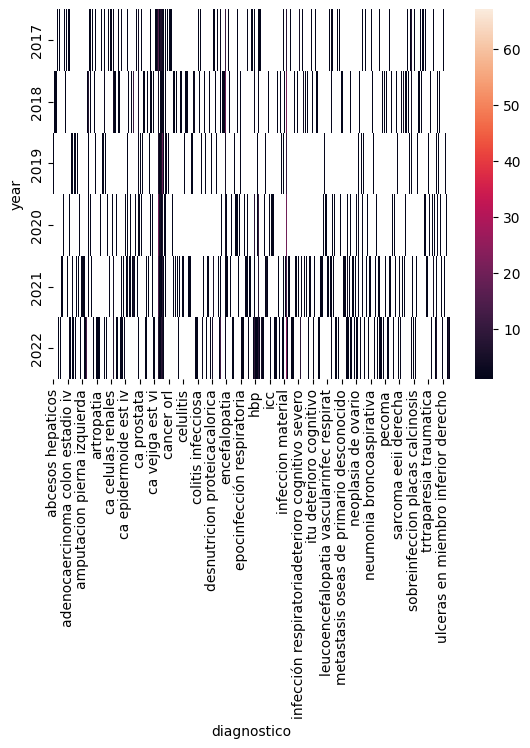

In [18]:
diagnosis_counts = df.groupby(['year', 'diagnostico']).size().unstack()
sns.heatmap(diagnosis_counts)


# 4. Análisis de texto

Dado que tienes un conjunto de diagnósticos en texto libre, puedes usar técnicas de procesamiento de lenguaje natural (NLP) para analizarlos. Algunas posibles técnicas que podrías considerar incluyen:

1. Extracción de Entidades: Esta técnica se refiere a la identificación de términos o frases específicas en el texto que corresponden a ciertas categorías, como enfermedades o condiciones médicas. Podrías intentar extraer términos médicos comunes de tus diagnósticos y luego usarlos para el análisis.

2. Tokenización y conteo de palabras: Puedes dividir cada diagnóstico en palabras individuales (tokens), y luego contar cuántas veces aparece cada palabra. Esto puede darte una idea de los términos más comunes en tus diagnósticos.

````python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
````

3. Análisis de Sentimientos: Aunque esto se usa más comúnmente con texto que expresa opiniones o emociones, podrías usar el análisis de sentimientos para identificar diagnósticos que indican condiciones especialmente graves o menos graves.

4. Agrupación de texto (clustering): Podrías usar técnicas de agrupación como K-means para agrupar diagnósticos similares. Antes de hacer esto, necesitarás convertir tus diagnósticos en un formato numérico usando algo como TF-IDF.

````python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
````

5. Identificación de Temas (Topic Modeling): Podrías usar técnicas de identificación de temas como LDA (Latent Dirichlet Allocation) para identificar los "temas" comunes en tus diagnósticos.


````python
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)
````


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

# Reemplazar valores nulos con una cadena vacía
df['diagnostico'] = df['diagnostico'].fillna('')

# Ahora puedes aplicar CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 from sklearn.feature_extraction.text import TfidfVectorizer                                 │
│    2 from sklearn.cluster import KMeans                                                          │
│    3                                                                                             │
│    4 # Reemplazar valores nulos con una cadena vacía                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'sklearn'

# 5. Análisis predictivo

In [ ]:
df.head()

# 6. Evaluación de los síntomas: 
¿Cuáles son los síntomas más comunes reportados? ¿Cómo varían estos en función del diagnóstico?

### Primero, analicemos los síntomas más comunes reportados:

In [20]:
import pandas as pd

# Calcular la frecuencia de cada síntoma
sintomas_freq = df['motivo_ing'].value_counts()

# Mostrar los 10 síntomas más comunes
print(sintomas_freq.head(10))

control de sintomas           794
antibioterapia iv             329
tratamiento antibiotico iv    267
control sintomas              193
control de síntomas           148
valoracion                    121
control evolutivo              99
tratamiento antibiótico iv     98
continuación de cuidados       84
cuidados paliativos            80
Name: motivo_ing, dtype: int64


### Como varían estos sínotmas en función del tratamiento

In [22]:
# Agrupar por diagnóstico y contar la frecuencia de los síntomas dentro de cada grupo
sintomas_por_diagnostico = df.groupby('diagnostico')['motivo_ing'].value_counts()

# Mostrar los síntomas más comunes para cada diagnóstico
print(sintomas_por_diagnostico)

diagnostico                     motivo_ing                
abcesos hepaticos               tratamiento antibiotico iv    1
absceso                         curas                         1
                                tratameinto antibiotico iv    1
absceso abdominal               antibioterapia iv             1
absceso cerebral                tratamiento antibiotico iv    1
                                                             ..
úlceras mmii                    curas                         1
úlceras necróticas              curas                         1
úlceras por presión             control de sintomas           1
úlceras por presión paraplejia  curas úlceras por presión     1
úlceras vasculares              curas                         1
Name: motivo_ing, Length: 2724, dtype: int64


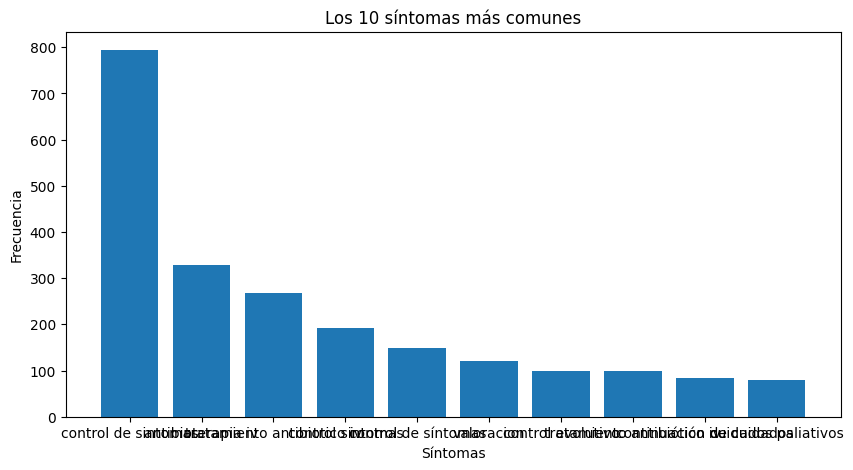

In [23]:
import matplotlib.pyplot as plt

# Obtener los 10 síntomas más comunes y sus frecuencias
top_sintomas = sintomas_freq.head(10)

# Crear una gráfica de barras
plt.figure(figsize=(10, 5))
plt.bar(top_sintomas.index, top_sintomas.values)

# Añadir títulos y etiquetas
plt.title('Los 10 síntomas más comunes')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()
